# Unsupervised Learning Project

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

### Import all the necessary libraries

Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Libraries for Machine Learning & PCA

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC

Library for GridSearch

In [3]:
from sklearn.model_selection import GridSearchCV

### Load the dataset

In [4]:
data = pd.read_csv('vehicle.csv')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Copying data to preserve the original data

In [5]:
df = data.copy(deep = True)

Shape of Dataset

In [6]:
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


Data Type of each column

In [7]:
print('The data type of each attribute: \n')
df.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845

Check for duplicated values, if any

In [8]:
print('Duplicated rows: ', df[df.duplicated()].shape[0]) #no duplicate rows

Duplicated rows:  0


Checking for number of missing values for every column

In [9]:
print('Null values:\n', df.isnull().sum())

Null values:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


We will replace the missing values with the median values of that particular column.

In [10]:
for cols in df.columns:
    if(cols != 'class'): 
        df[cols] = df[cols].fillna(df[cols].median())

#### Descriptive Statistics
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [11]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

Distribution Plots of all independent variables.

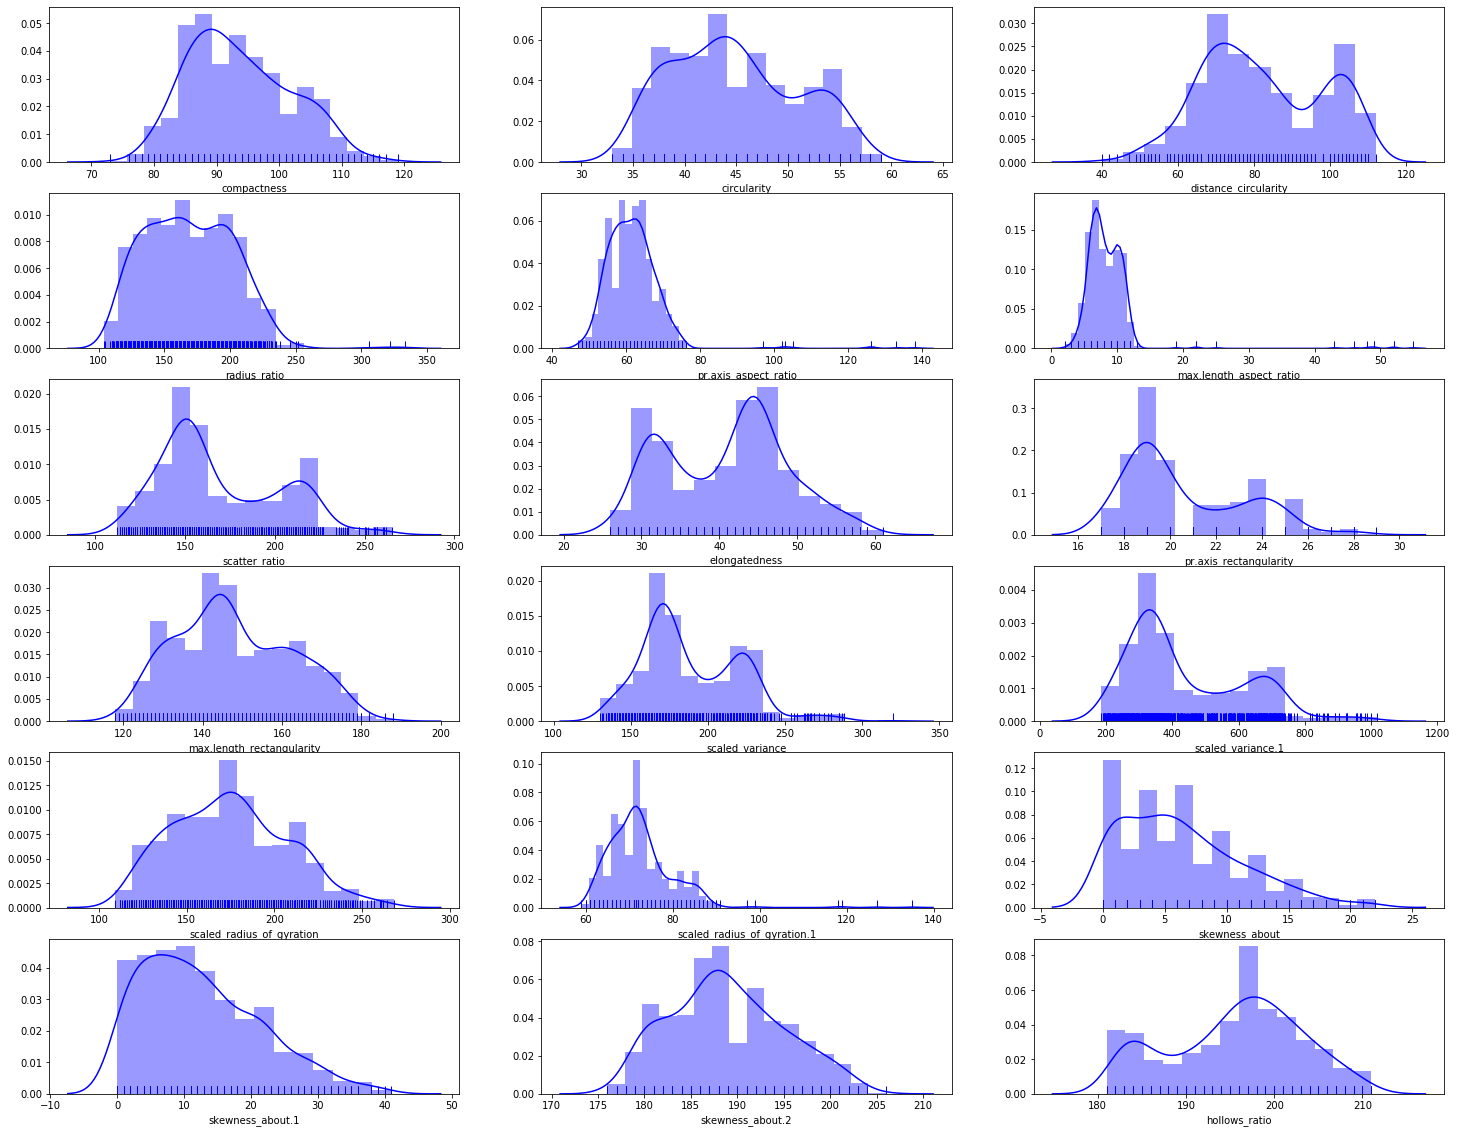

In [12]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1 

#### Statistical Inference
 - Columns have data distributed across multiple scales.
 - Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness
 - Column skweness_about, skewness_about.1 have data that is right skewed whereas for column skewness_about.2 data is nearly normally distributed.
 - Some columns have long right tail (eg.: pr.axis_aspect_ratio) as evident from the above distplot it is highly likely that they will have outliers.

Count Plot of Vehicle Class (target) column.

car    429
bus    218
van    199
Name: class, dtype: int64


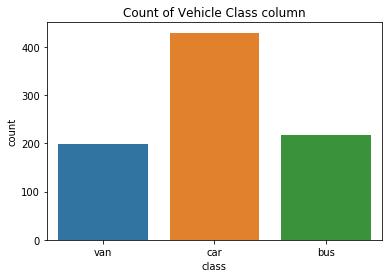

In [13]:
print(df['class'].value_counts())
plt.title('Count of Vehicle Class column')
sns.countplot(x = 'class', data = df)

Boxplots- to check for outliers

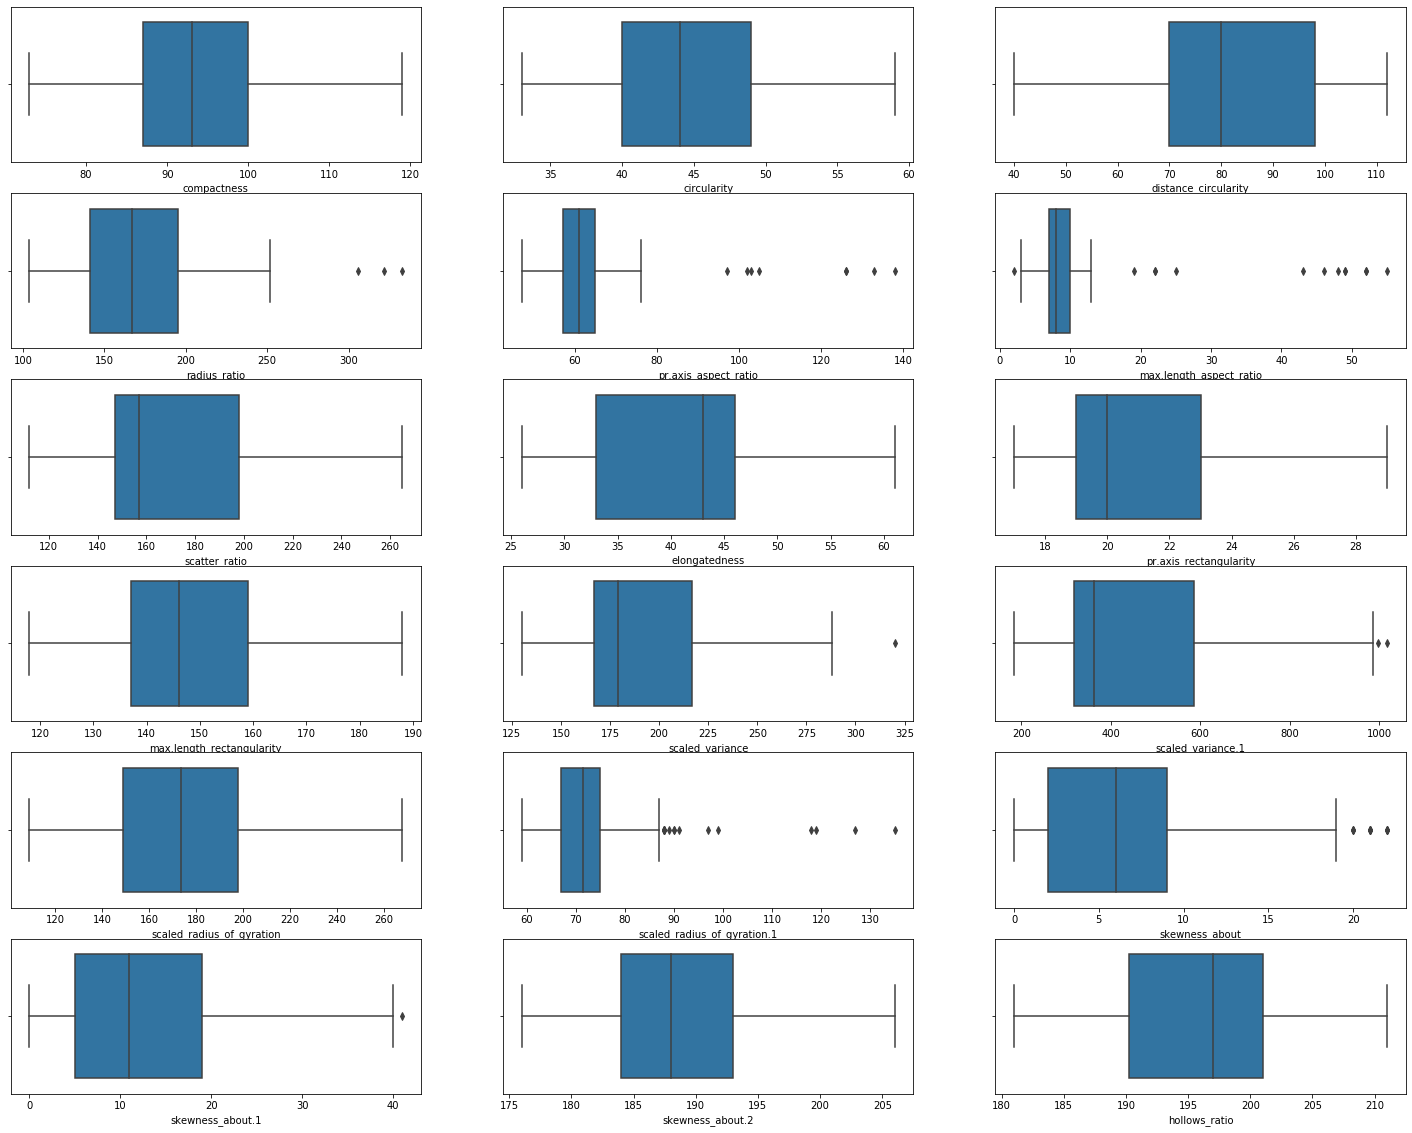

In [14]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i])
    col += 1 

#### Outliers
 - Above Boxplots reveal that there are outliers in 7 different columns.
 - For better clarity we will plot box plots of indivdual columns.

Text(0.5, 1.0, 'Boxplot of Skewness About Column')

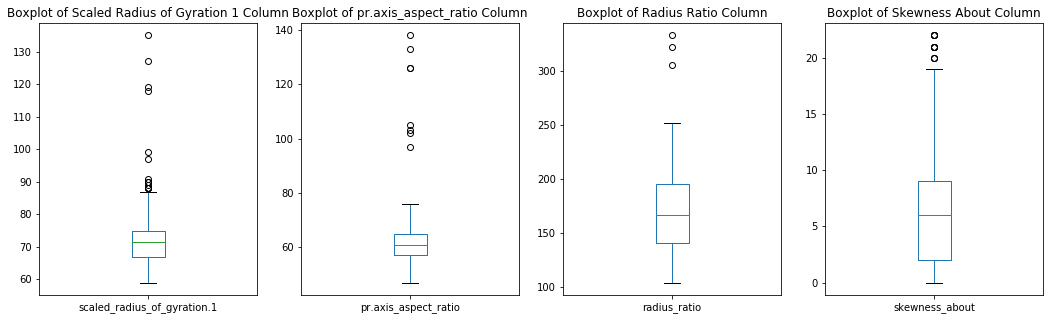

In [15]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 4, 1)
df['scaled_radius_of_gyration.1'].plot(x = 'scaled_radius_of_gyration.1', kind = 'box')
plt.title('Boxplot of Scaled Radius of Gyration 1 Column')


plt.subplot(1, 4, 2)
df['pr.axis_aspect_ratio'].plot(x = 'pr.axis_aspect_ratio', kind = 'box')
plt.title('Boxplot of pr.axis_aspect_ratio Column')

plt.subplot(1, 4, 3)
df.radius_ratio.plot(x = 'radius_ratio', kind = 'box')
plt.title('Boxplot of Radius Ratio Column')


plt.subplot(1, 4, 4)
df.skewness_about.plot(x = 'skewness_about', kind = 'box')
plt.title('Boxplot of Skewness About Column')

Columns - scaled_radius_of_gyration.1 and pr.axis_aspect_ratio have most outliers amongst the total number of outliers present in multiple columns.

Text(0.5, 1.0, 'Boxplot of Skewness About 1 Column')

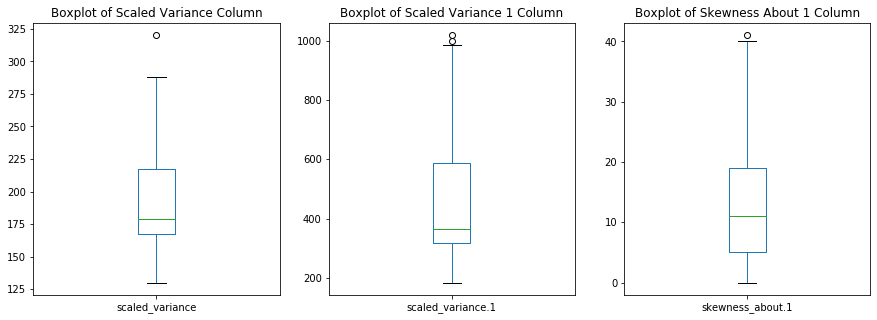

In [16]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
df.scaled_variance.plot(x = 'scaled_variance', kind = 'box')
plt.title('Boxplot of Scaled Variance Column')

plt.subplot(1, 3, 2)
df['scaled_variance.1'].plot(x = 'scaled_variance.1', kind = 'box')
plt.title('Boxplot of Scaled Variance 1 Column')

plt.subplot(1, 3, 3)
df['skewness_about.1'].plot(x = 'skewness_about.1 ', kind = 'box')
plt.title('Boxplot of Skewness About 1 Column')

#### Outlier Treatment

In [17]:
#find the outliers and replace them by median
for col_name in df.drop(columns = 'class').columns:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

Boxplot of all columns after outlier treatment

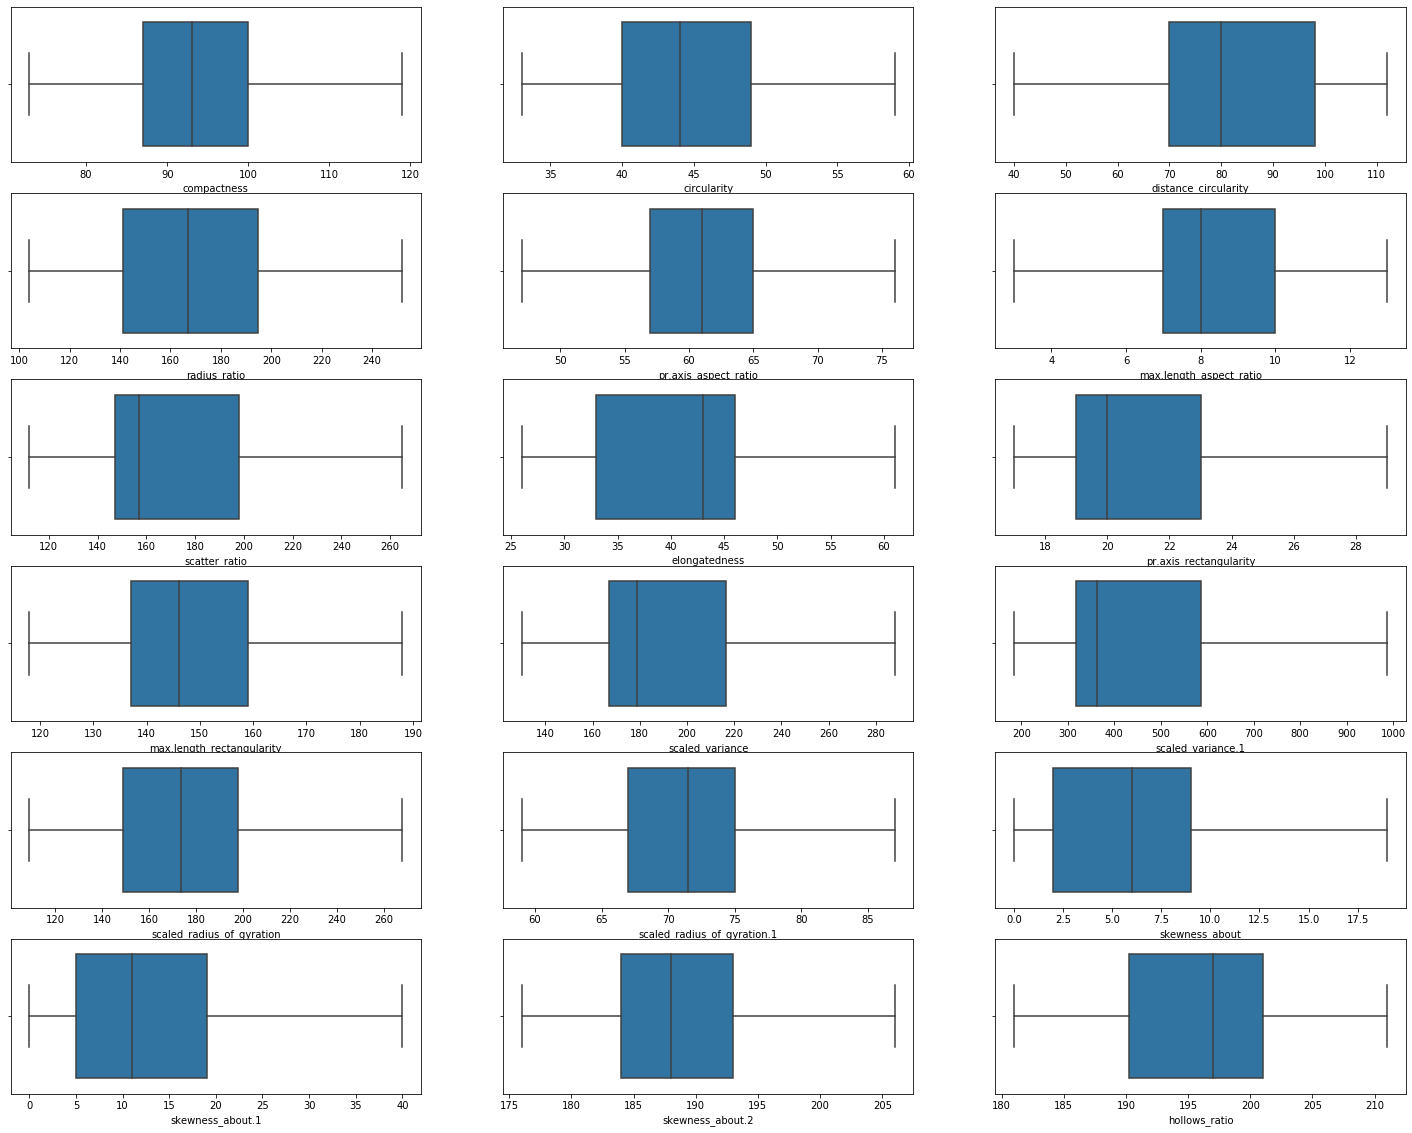

In [18]:
plt.figure(figsize=(25, 20))
col = 1m
    sns.boxplot(df[i])
    col += 1 

## 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

Pair Plot of the original dataset

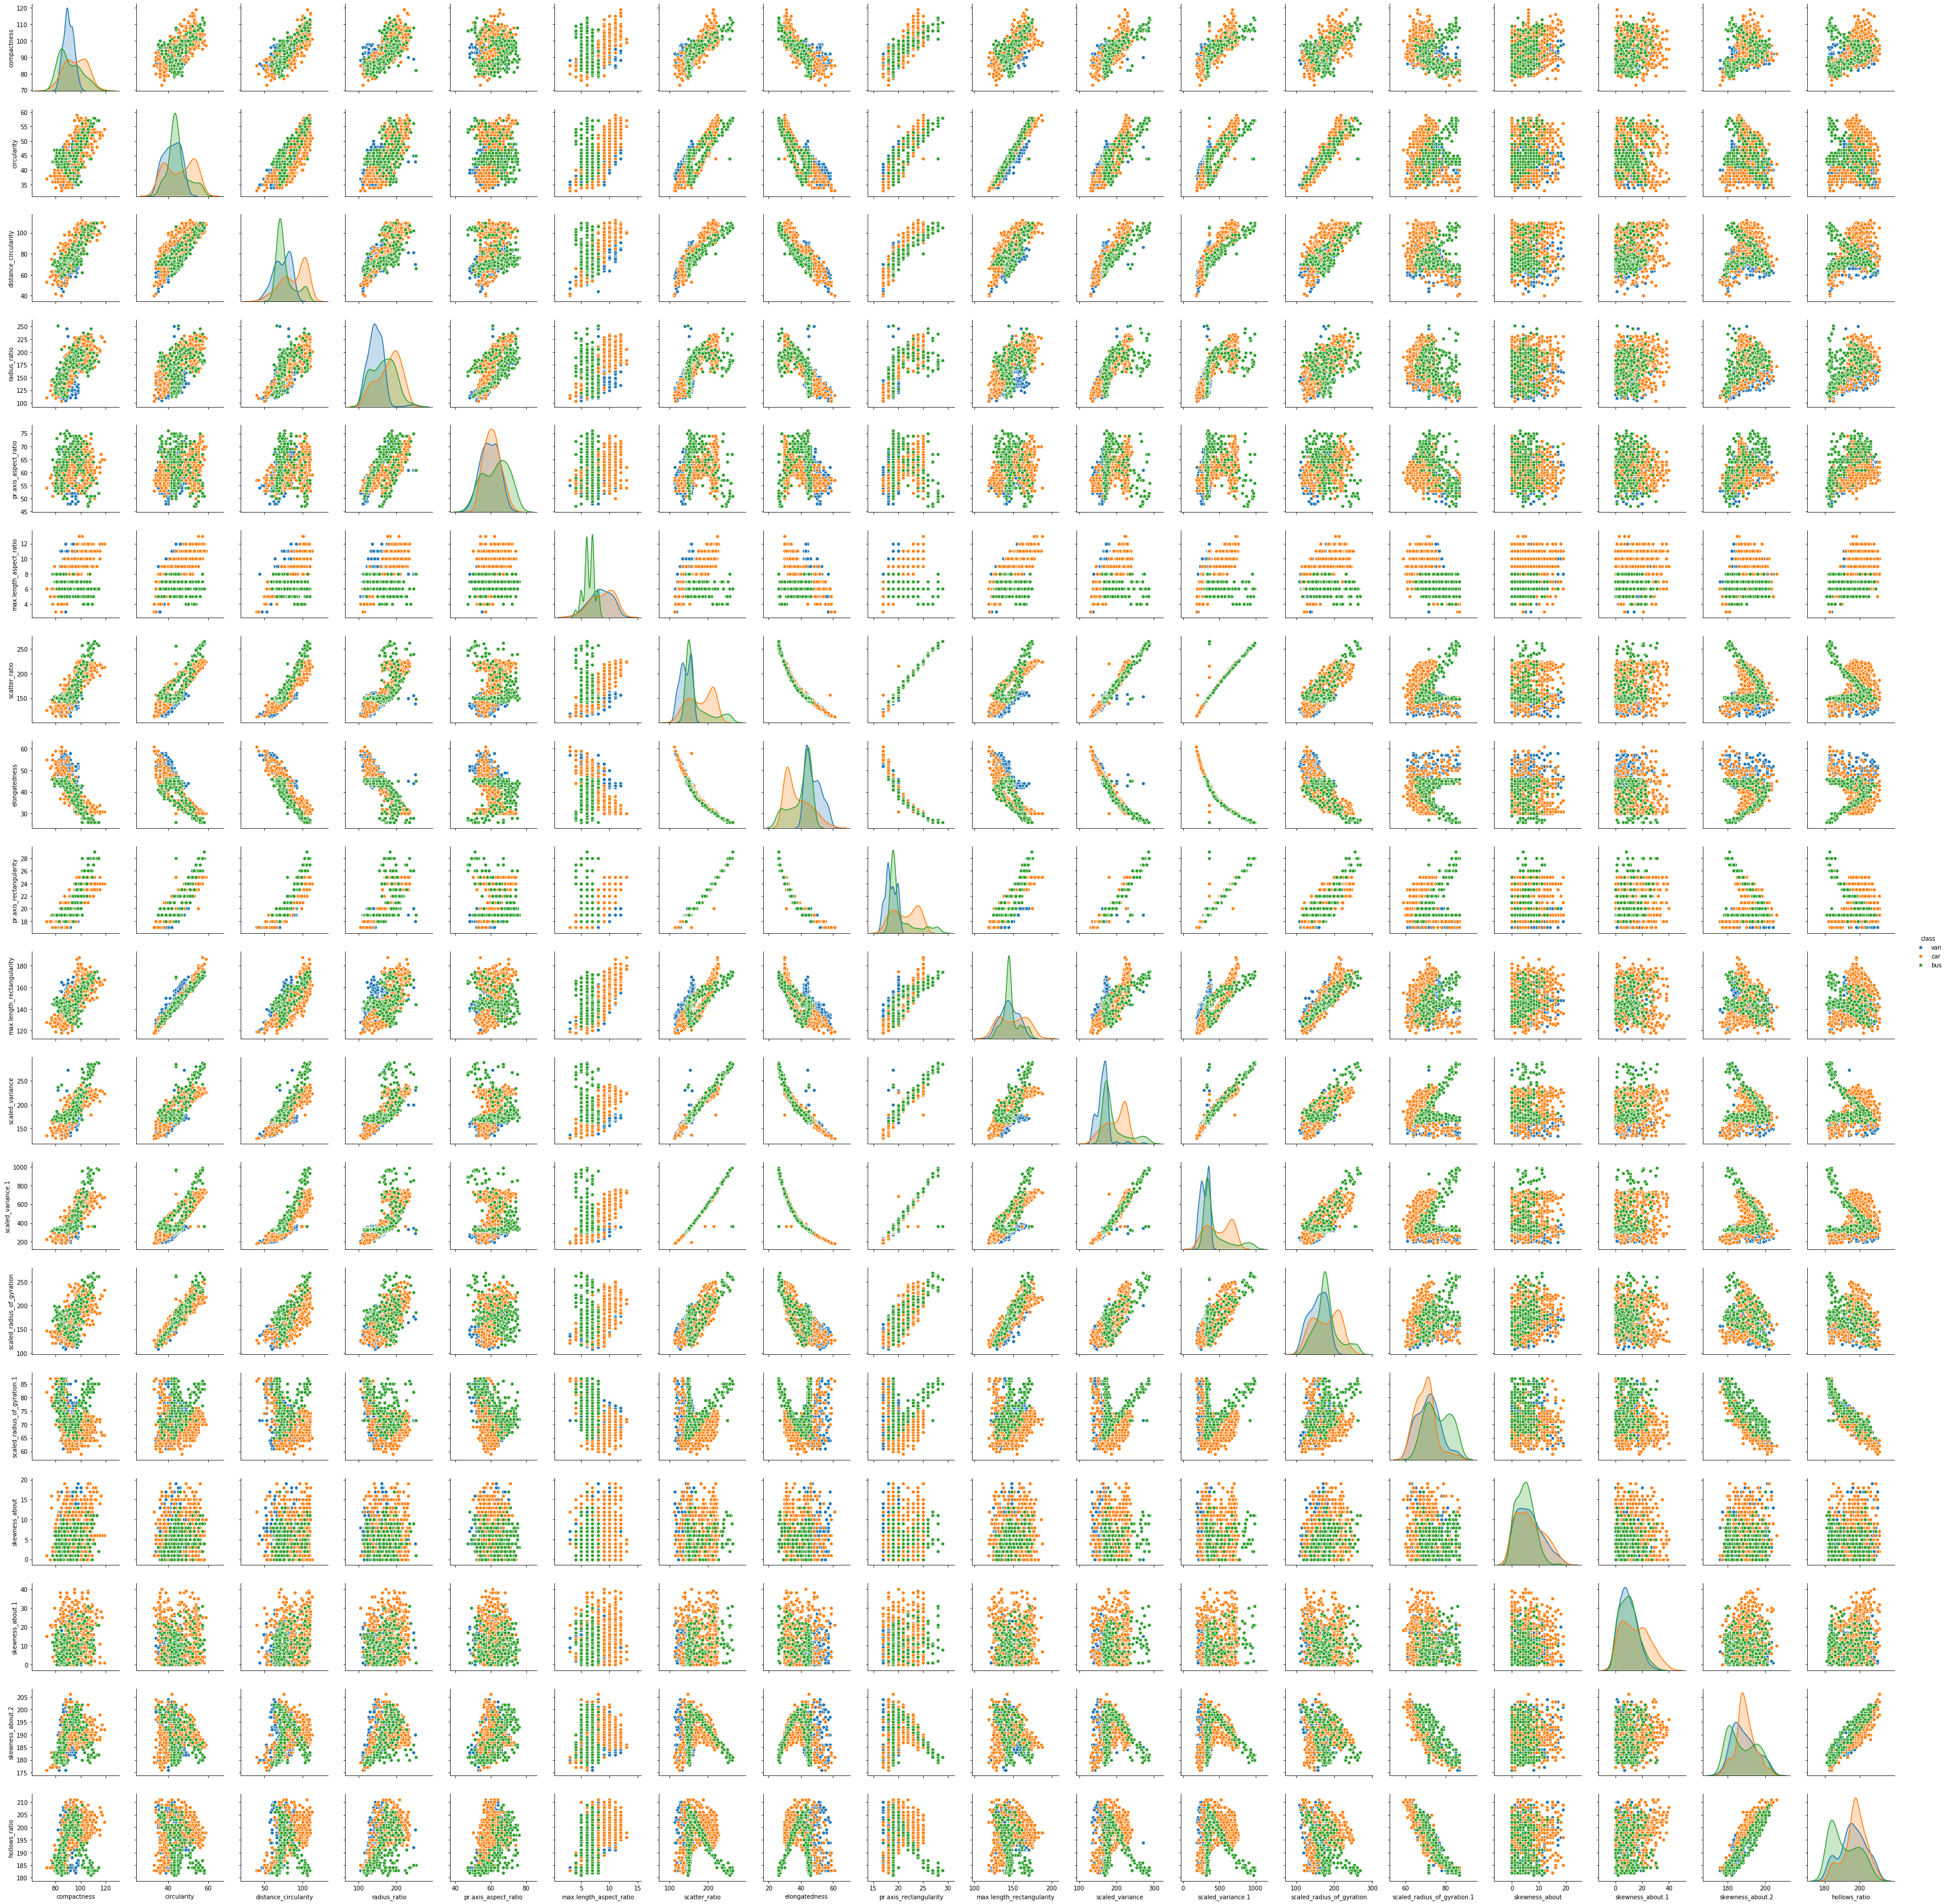

In [19]:
sns.pairplot(df, diag_kind = 'kde', hue = 'class')

In [20]:
correlation = df.corr()
correlation

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                              0.081898       0.064242   
skewness_about.1                            0.141664       0.211647   
skewness_about.2                            0.

df.corr() computes pairwise correlation of columns. 
 - Correlation shows how two variables are related to each other.
 - Positive values shows as one variable increases other variable increases as well. 
 - Negative values shows as one variable increases other variable decreases.
 - Bigger values show high correlation between variables while smaller values show less correlation.

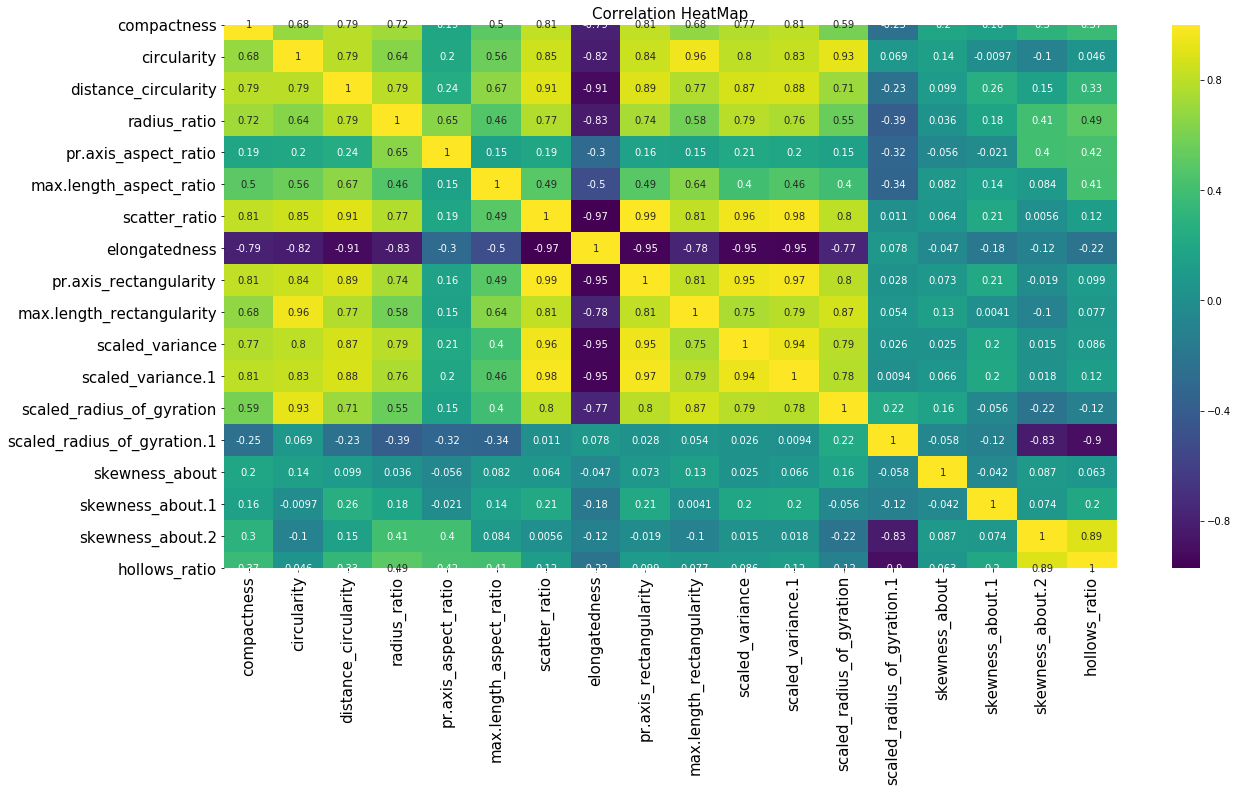

In [21]:
plt.figure(figsize = (20, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'viridis')

Splitting the dependent and independent variables. The dependent variable (y) is further transformed into an encoded categorical column.

In [22]:
X = df.loc[:, df.columns != 'class']
y = df['class'].astype('category').cat.codes

Text(0.5, 1.0, 'Correlation with Class column')

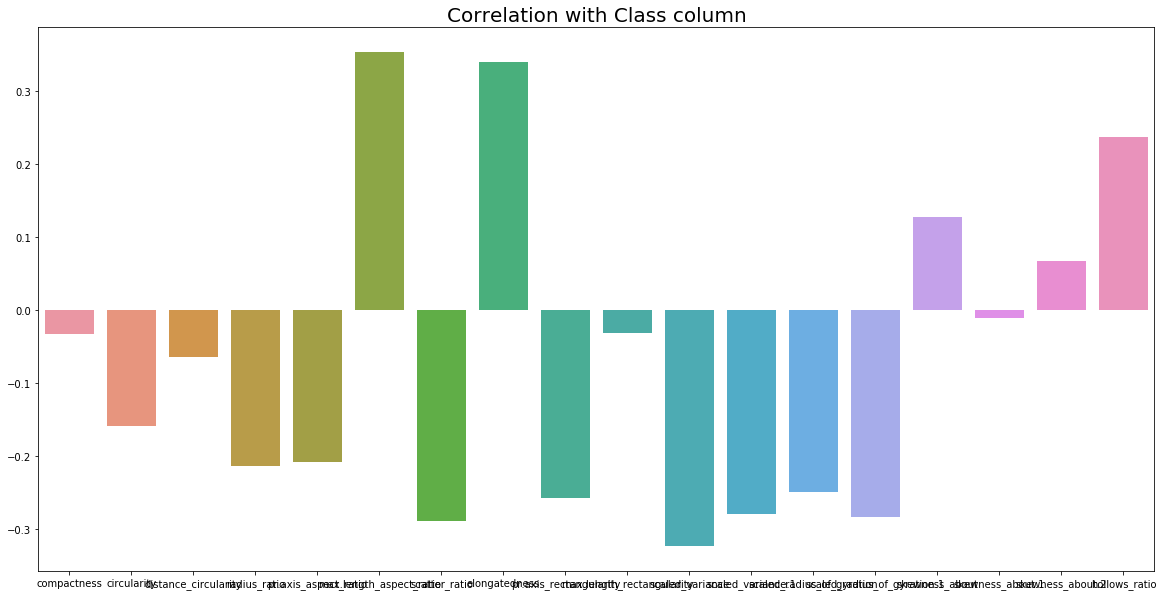

In [23]:
plt.figure(figsize = (20, 10))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)

## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

Using Robust Scaler to standardize the values of each column. This is required in order to bring the input variables on same scale, which might be on different scales in the raw form.

In [24]:
X_col = X.columns
scaler = RobustScaler()
X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.153846     0.444444              0.107143      0.204651   
1    -0.153846    -0.333333              0.142857     -0.483721   
2     0.846154     0.666667              0.928571      0.781395   
3     0.000000    -0.333333              0.071429     -0.148837   
4    -0.615385     0.000000             -0.357143      0.706977   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 1.375                 0.666667       0.098039   
1                -0.500                 0.333333      -0.156863   
2                 0.625                 0.666667       0.980392   
3                 0.250                 0.333333      -0.254902   
4                 0.000                 0.000000      -0.156863   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.076923                    0.00                   0.590909   
1       0.153846                   -0.25                  -0.136364   
2      -0.846154                    0.75                   0.545455   
3       0.230769                   -0.25                  -0.136364   
4       0.153846                   -0.25                  -0.090909   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.060302           0.057890                   0.214286   
1        -0.180905          -0.125117                  -0.316327   
2         0.884422           1.014006                   0.948980   
3        -0.381910          -0.203548                  -0.948980   
4         1.246231          -0.143791                   0.295918   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.1875        0.000000          0.357143   
1                       0.0625        0.428571          0.214286   
2                       0.1875        1.142857         -0.142857   
3                      -1.0625        0.000000         -0.071429   
4                       0.0000        0.428571          0.000000   

   skewness_about.2  hollows_ratio  
0         -0.111111       0.000000  
1          0.111111       0.186047  
2          0.000000      -0.093023  
3          1.222222       0.930233  
4         -0.888889      -1.302326

Text(0, 0.5, 'Percentage of Cumulative Explained Variance')

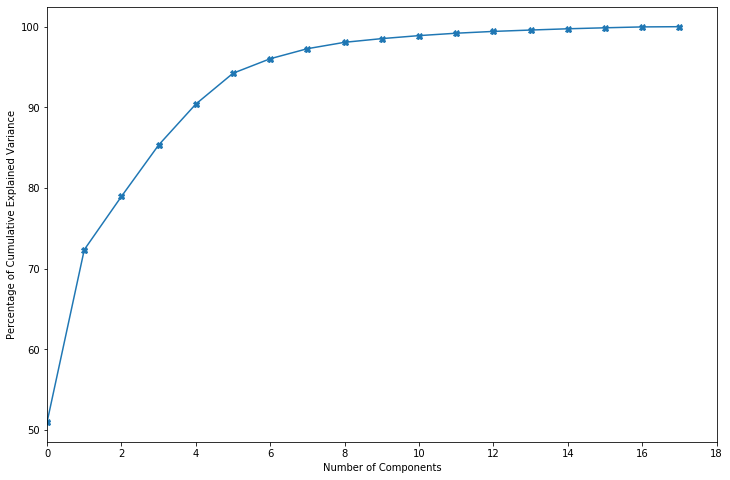

In [25]:
pca = PCA()

X_pca_ = pca.fit_transform(X_std)

plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')

Text(0.5, 1.0, 'Vehicle Dataset Explained Variance')

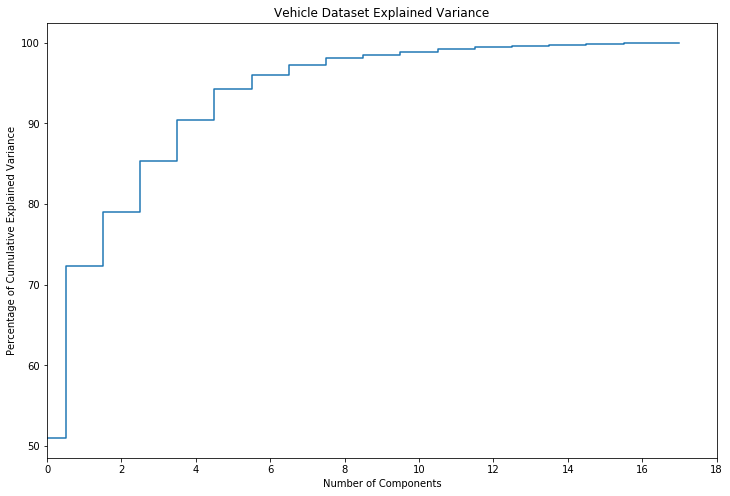

In [26]:
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance')

#### Findings after applying PCA on the dataset
 - We can see that the first seven components explain more than 95% of variation.
 - Between first five components, more than 91% of the information is captured.
 - The above plot shows almost 95% variance by the first 7 components. Therefore we can drop 8th component onwards.

Eigen Values

In [27]:
print('Eigen Values: \n')
pca.explained_variance_

Eigen Values: 



array([3.96100935e+00, 1.65870806e+00, 5.13125294e-01, 4.94835514e-01,
       3.94116009e-01, 2.96614528e-01, 1.39542157e-01, 9.65854893e-02,
       6.14513508e-02, 3.54768843e-02, 2.88836973e-02, 2.31031113e-02,
       1.73160148e-02, 1.31973434e-02, 1.21370214e-02, 9.51277726e-03,
       8.47124019e-03, 2.15456314e-03])

Eigen Vectors

In [28]:
print('Eigen Vectors: \n')
pca.components_

Eigen Vectors: 



array([[ 2.70447593e-01,  3.08703426e-01,  2.65942302e-01,
         2.52585109e-01,  1.09214594e-01,  2.13874526e-01,
         3.15596351e-01, -2.89988322e-01,  3.10540787e-01,
         2.89929102e-01,  2.91291670e-01,  3.10633904e-01,
         2.75022976e-01, -5.33629155e-02,  3.81838626e-02,
         5.63034801e-02,  4.22027355e-02,  9.45420647e-02],
       [-7.47916800e-02,  1.26651078e-01, -3.48093808e-02,
        -1.62272484e-01, -2.48978101e-01, -1.08750428e-01,
         7.36512380e-02, -1.53458109e-02,  8.42168152e-02,
         1.13034088e-01,  7.29964089e-02,  7.02249862e-02,
         1.97981239e-01,  5.56982050e-01, -1.57637616e-02,
        -7.55602532e-02, -4.86108063e-01, -4.99531014e-01],
       [-1.18830485e-01, -5.87844882e-02, -6.00864271e-02,
         2.49637579e-01,  6.08795859e-01, -3.65061020e-01,
         4.64038791e-02, -9.41521128e-02,  2.21250572e-02,
        -1.41319498e-01,  1.17492762e-01,  5.55858661e-02,
        -7.03700592e-03,  1.66474566e-01, -5.67582188e

The percentage of variation explained by each Eigen Vector

In [29]:
print('The percentage of variation explained by each Eigen Vector: \n')
pca.explained_variance_ratio_

The percentage of variation explained by each Eigen Vector: 



array([5.10029196e-01, 2.13579284e-01, 6.60712607e-02, 6.37162241e-02,
       5.07473357e-02, 3.81928080e-02, 1.79677874e-02, 1.24365825e-02,
       7.91262536e-03, 4.56808990e-03, 3.71913510e-03, 2.97481279e-03,
       2.22965218e-03, 1.69932203e-03, 1.56279239e-03, 1.22488833e-03,
       1.09077749e-03, 2.77426790e-04])

Text(0.5, 0, 'Principal Components')

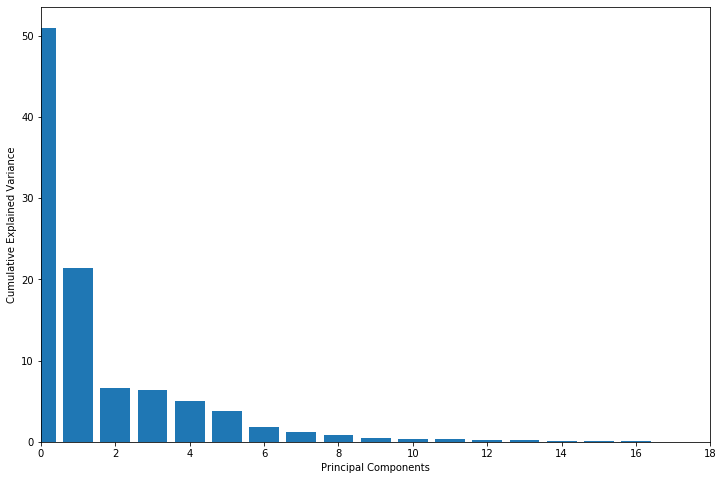

In [30]:
## PCA visualization how information is captured across components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)

plt.figure(figsize = (12, 8))
plt.bar(x = list(range(18)), height = percent_variance)
plt.xlim(0, 18)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')

Text(0.5, 0, 'Principal Components')

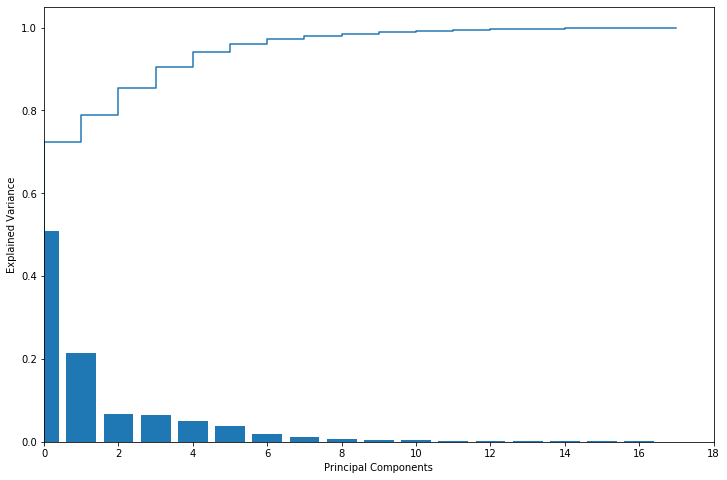

In [31]:
plt.figure(figsize = (12, 8))
plt.step(range(18), np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(18), pca.explained_variance_ratio_)
plt.xlim(0, 18)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

Text(0.5, 0, 'Principal Components')

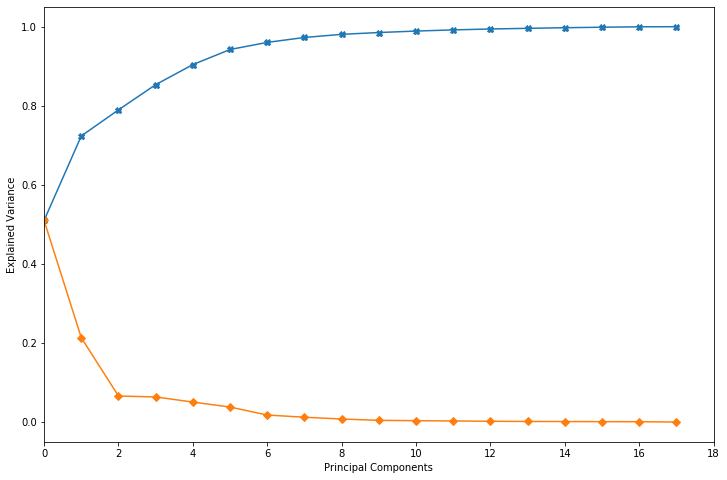

In [32]:
plt.figure(figsize = (12, 8))
plt.plot(range(18), np.cumsum(pca.explained_variance_ratio_), marker = 'X')
plt.plot(range(18), pca.explained_variance_ratio_, marker = 'D')
plt.xlim(0, 18)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance.

#### Applying PCA on 7 Components

In [33]:
pca_7 = PCA(n_components = 7)

X_pca = pca_7.fit_transform(X_std)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 7


In [34]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

0         1         2         3         4         5         6
0  0.446376 -0.475441  0.415578 -0.591180 -0.628784 -1.166228 -0.141708
1 -0.969205 -0.247348 -0.860688  0.132533 -0.118024 -0.153620  0.121625
2  2.471311  0.202940 -0.292011 -0.761633  0.598456 -0.485311  0.517423
3 -0.945422 -2.161404 -0.350315 -0.148290 -0.333014  0.219506  0.096389
4 -0.440204  1.005528  0.217450 -0.347911  0.147644 -0.579934  0.214694

Pairplot of PCA Dataset

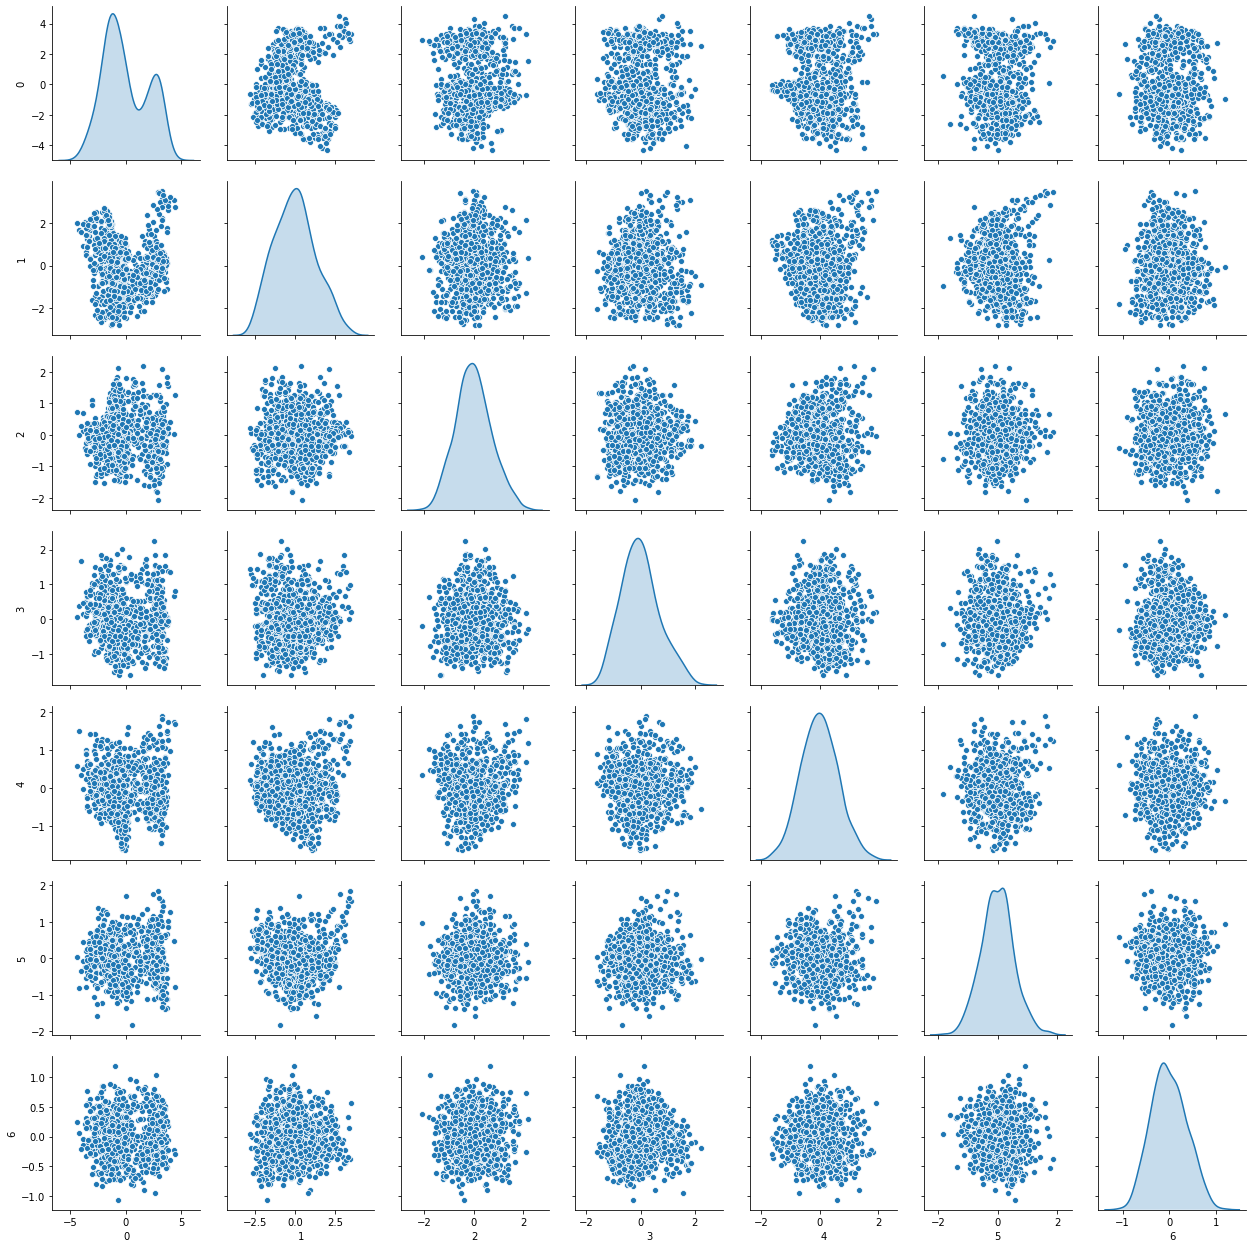

In [35]:
sns.pairplot(pca_df, diag_kind = 'kde')

Splitting the data into training (70%) and testing set (30%). 

Original Dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [37]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 18 columns.


In [38]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 18 columns.


PCA reduced Dataset

In [39]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [40]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 7 columns.


In [41]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 7 columns.


## 4. Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X).

### SVC Model with PCA

SVC Model of dataset with PCA

Accuracy Score of Training Data:  0.839527027027027

Accuracy Score of Test Data: 0.8543307086614174

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.81      0.86      0.84        71
           1       0.92      0.83      0.87       125
           2       0.79      0.90      0.84        58

    accuracy                           0.85       254
   macro avg       0.84      0.86      0.85       254
weighted avg       0.86      0.85      0.86       254


Mean Absolute Error of SVC:
 0.1732283464566929

Confusion Matrix of SVC:
 [[ 61   7   3]
 [ 10 104  11]
 [  4   2  52]]


Text(0.5, 1, 'Confusion Matrix HeatMap of SVC with PCA Model')

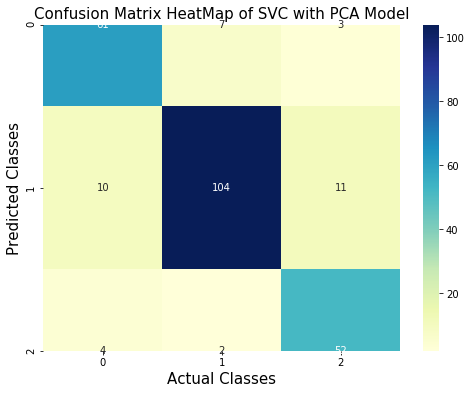

In [42]:
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)

print('SVC Model of dataset with PCA')
# fitting the model
svc_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_pca = svc_model.predict(X_te)

modeltrSVC_pca_score = svc_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_pca_score)
modelSVC_pca_score = accuracy_score(y_te, y_predictSVC_pca)
print('\nAccuracy Score of Test Data:', modelSVC_pca_score)

cfm_SVC_pca = confusion_matrix(y_te, y_predictSVC_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [43]:
precision_SVC_pca, recall_SVC_pca, f1_score_SVC_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_pca)
print('Recall Score :', '%0.2f' % recall_SVC_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_pca)
print('Accuracy Score :','%0.2f' % modelSVC_pca_score)

Precision Score : 0.84
Recall Score : 0.86
F1-Score : 0.85
Accuracy Score : 0.85


### SVC Model without PCA

SVC Model of dataset without PCA

Accuracy Score of Training Data:  0.9425675675675675

Accuracy Score of Test Data: 0.9448818897637795

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.97      0.93      0.95       125
           2       0.90      0.98      0.94        58

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.94      0.94       254


Mean Absolute Error of SVC:
 0.05905511811023622

Confusion Matrix of SVC:
 [[ 67   3   1]
 [  4 116   5]
 [  0   1  57]]


Text(0.5, 1, 'Confusion Matrix HeatMap of SVC Model')

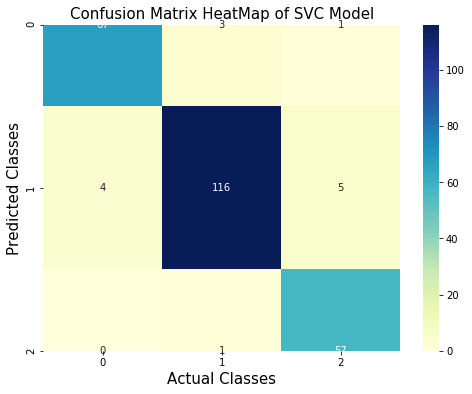

In [44]:
print('SVC Model of dataset without PCA')
# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

modeltrSVC_score = svc_model.score(X_train, y_train)
print('\nAccuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

In [45]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score)

Precision Score : 0.94
Recall Score : 0.95
F1-Score : 0.94
Accuracy Score : 0.94


Dataframe showing results of models with and without PCA

In [46]:
mdllists = []
mdllists.append(['Support Vector Classifier with PCA', modeltrSVC_pca_score * 100, modelSVC_pca_score * 100, recall_SVC_pca * 100, precision_SVC_pca * 100])
mdllists.append(['Support Vector Classifier without PCA', modeltrSVC_score * 100, modelSVC_score * 100, recall_SVC * 100, precision_SVC * 100])
mdl_df = pd.DataFrame(mdllists, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_df

Model  Accuracy Score of Training Data  \
0     Support Vector Classifier with PCA                        83.952703   
1  Support Vector Classifier without PCA                        94.256757   

   Accuracy Score of Test Data  Recall Score  Precision Score  
0                    85.433071     86.256888        84.052203  
1                    94.488189     95.147353        93.836351

We can see that the accuracy score of Test Data has reduced with PCA by about 13.78%.

## 5. Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

### Grid Search with PCA dataset

In [47]:
param_grid_pca = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]


# Make grid search classifier
clf_grid_pca = GridSearchCV(SVC(), param_grid_pca, verbose = 1)
 
# Train the classifier
clf_grid_pca.fit(X_tr, y_tr)
 

print('\n\nBest Parameters:\n', clf_grid_pca.best_params_)
print('\n\nBest Estimators:\n', clf_grid_pca.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Parameters:
 {'C': 1, 'kernel': 'rbf'}


Best Estimators:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


According to Grid Search, the RBF model of SVC with C (regularization parameter) as 1

Use the SVC parameter as suggested by Grid Search


Accuracy Score of Training Data:  0.9375

Accuracy Score of Test Data: 0.9133858267716536

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.90      0.92       125
           2       0.81      0.88      0.84        58

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.91       254
weighted avg       0.92      0.91      0.91       254


Mean Absolute Error of SVC:
 0.09448818897637795

Confusion Matrix of SVC:
 [[ 68   2   1]
 [  1 113  11]
 [  1   6  51]]


Text(0.5, 1, 'Confusion Matrix HeatMap of SVC with PCA Model')

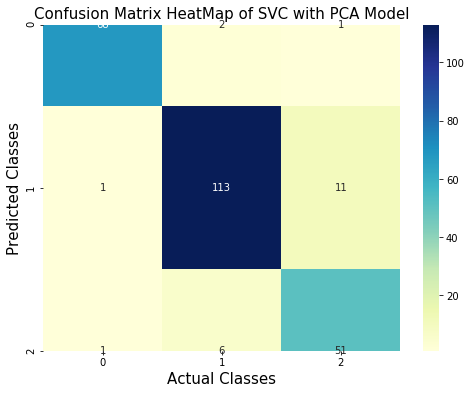

In [48]:
svc_cv_pca_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)


# fitting the model
svc_cv_pca_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_cv_pca = svc_cv_pca_model.predict(X_te)

modeltrSVC_cv_pca_score = svc_cv_pca_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_cv_pca_score)
modelSVC_cv_pca_score = accuracy_score(y_te, y_predictSVC_cv_pca)
print('\nAccuracy Score of Test Data:', modelSVC_cv_pca_score)

cfm_SVC_cv_pca = confusion_matrix(y_te, y_predictSVC_cv_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_cv_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_cv_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_cv_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [49]:
precision_SVC_cv_pca, recall_SVC_cv_pca, f1_score_SVC_cv_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_cv_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv_pca)
print('Recall Score :', '%0.2f' % recall_SVC_cv_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv_pca)
print('Accuracy Score :','%0.2f' % modelSVC_cv_pca_score)

Precision Score : 0.90
Recall Score : 0.91
F1-Score : 0.91
Accuracy Score : 0.91


### Grid Search with original dataset

In [50]:
param_grid = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]


# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose = 1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 

print('\n\nBest Parameters:\n', clf_grid.best_params_)
print('\n\nBest Estimators:\n', clf_grid.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Parameters:
 {'C': 1, 'kernel': 'rbf'}


Best Estimators:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


According to Grid Search, the RBF model of SVC with C (regularization parameter) as 1

Use the SVC parameter as suggested by Grid Search

Accuracy Score of Training Data:  0.9662162162162162

Accuracy Score of Test Data: 0.9606299212598425

Classification Report of SVC Linear Model:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.93      0.92        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


Mean Absolute Error of SVC Linear:
 0.047244094488188976

Confusion Matrix of SVC Linear:
 [[ 70   0   1]
 [  0 120   5]
 [  1   3  54]]


Text(0.5, 1, 'Confusion Matrix HeatMap of SVC Grid Search Model')

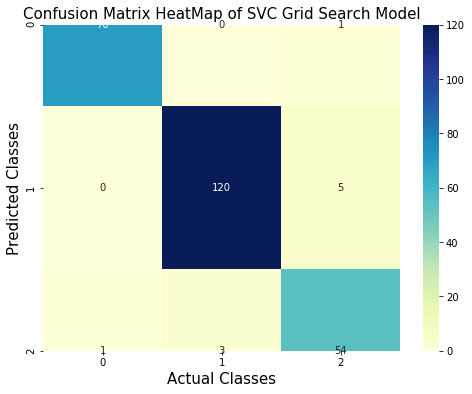

In [51]:
svc_cv_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)

# fitting the model
svc_cv_model.fit(X_train, y_train)

# predict the response
y_predictSVC_cv = svc_cv_model.predict(X_test)

modeltrSVC_cv_score = svc_cv_model.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrSVC_cv_score)

cfm_SVC_cv = confusion_matrix(y_test, y_predictSVC_cv)


# evaluate accuracy
modelSVC_score_cv = accuracy_score(y_test, y_predictSVC_cv)
print('\nAccuracy Score of Test Data:', modelSVC_score_cv)
print('\nClassification Report of SVC Linear Model:\n ', classification_report(y_test, y_predictSVC_cv))
print('\nMean Absolute Error of SVC Linear:\n', mean_absolute_error(y_test, y_predictSVC_cv))
print('\nConfusion Matrix of SVC Linear:\n', cfm_SVC_cv)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Grid Search Model', fontsize = 15)

In [52]:
precision_SVC_cv, recall_SVC_cv, f1_score_SVC_cv, support = precision_recall_fscore_support(y_test, y_predictSVC_cv, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv)
print('Recall Score :', '%0.2f' % recall_SVC_cv)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv)
print('Accuracy Score :','%0.2f' % modelSVC_score_cv)

Precision Score : 0.95
Recall Score : 0.96
F1-Score : 0.96
Accuracy Score : 0.96


Dataframe of GridSearch suggested models

In [53]:
modellsts = []

modellsts.append(['Support Vector Classifier with PCA using Grid Search', modeltrSVC_cv_pca_score * 100, modelSVC_cv_pca_score * 100, recall_SVC_cv_pca * 100, precision_SVC_cv_pca * 100])
modellsts.append(['Support Vector Classifier using Grid Search', modeltrSVC_cv_score * 100, modelSVC_score_cv * 100, recall_SVC_cv * 100, precision_SVC_cv * 100])

md_df = pd.DataFrame(modellsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
md_df

Model  \
0  Support Vector Classifier with PCA using Grid ...   
1        Support Vector Classifier using Grid Search   

   Accuracy Score of Training Data  Accuracy Score of Test Data  Recall Score  \
0                        93.750000                    91.338583     91.368561   
1                        96.621622                    96.062992     95.898333   

   Precision Score  
0        90.494556  
1        95.384175

## Consodilated dataframe of all models

In [54]:
modellists = []
modellists.append(['Support Vector Classifier with PCA', modeltrSVC_pca_score * 100, modelSVC_pca_score * 100, recall_SVC_pca * 100, precision_SVC_pca * 100])
modellists.append(['Support Vector Classifier with PCA using Grid Search', modeltrSVC_cv_pca_score * 100, modelSVC_cv_pca_score * 100, recall_SVC_cv_pca * 100, precision_SVC_cv_pca * 100])
modellists.append(['Support Vector Classifier using Grid Search', modeltrSVC_cv_score * 100, modelSVC_score_cv * 100, recall_SVC_cv * 100, precision_SVC_cv * 100])
modellists.append(['Support Vector Classifier without PCA', modeltrSVC_score * 100, modelSVC_score * 100, recall_SVC * 100, precision_SVC * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
model_df

Model  \
0                 Support Vector Classifier with PCA   
1  Support Vector Classifier with PCA using Grid ...   
2        Support Vector Classifier using Grid Search   
3              Support Vector Classifier without PCA   

   Accuracy Score of Training Data  Accuracy Score of Test Data  Recall Score  \
0                        83.952703                    85.433071     86.256888   
1                        93.750000                    91.338583     91.368561   
2                        96.621622                    96.062992     95.898333   
3                        94.256757                    94.488189     95.147353   

   Precision Score  
0        84.052203  
1        90.494556  
2        95.384175  
3        93.836351

Text(0.5, 1.0, 'Comparison of Classification Models')

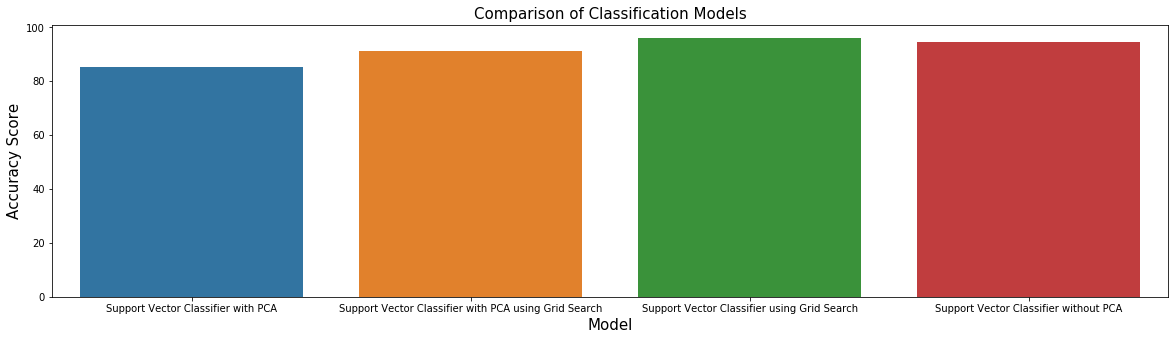

In [55]:
plt.figure(figsize = (20, 5))
sns.barplot(x = model_df['Model'], y = model_df['Accuracy Score of Test Data'], data = model_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)

When we use the hyperparameters suggested by Grid Search:
 * The accuracy score of the PCA dataset increases by 5.11%.
 * The accuracy score of the original dataset increases by 1.58%.